Exercise 3: Least square fit with a 3rd order polynomial with iminuit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Data x,y and dy
x = np.array([0.2 , 0.4 , 0.6 , 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2.,  2.2, 2.4, 2.6, 2.8 , 3.,  3.2 ,3.4, 3.6, 3.8,4.],dtype='d')
dy = np.array([0.04,0.021,0.035,0.03,0.029,0.019,0.024,0.018,0.019,0.022,0.02,0.025,0.018,0.024,0.019,0.021,0.03,0.019,0.03,0.024 ], dtype='d')
y = np.array([1.792,1.695,1.541,1.514,1.427,1.399,1.388,1.270,1.262,1.228,1.189,1.182,1.121,1.129,1.124,1.089,1.092,1.084,1.058,1.057 ], dtype='d')

In [3]:
# Define fit functions - a 3rd order polynomial
def pol3(a0, a1, a2, a3):
    return a0 + x*a1 + a2*x**2 + a3*x**3

In [4]:
# least-squares function = sum of data residuals squared
def LSQ(a0, a1, a2, a3):
    return np.sum((y - pol3(a0, a1, a2, a3)) ** 2 / dy ** 2)

In [5]:
# import minuit2 fitting library
from iminuit import Minuit

In [6]:
#  create instance of Minuit and use LSQ function to minimize
LSQ.errordef = Minuit.LEAST_SQUARES
m = Minuit(LSQ,a0=0.01, a1=0.05 ,a2=0.01 ,a3=0.001)

In [7]:
m.params

┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │  10.0e-3  │  0.1e-3   │            │            │         │         │       │
│ 1 │ a1   │  50.0e-3  │  0.5e-3   │            │            │         │         │       │
│ 2 │ a2   │  10.0e-3  │  0.1e-3   │            │            │         │         │       │
│ 3 │ a3   │  1.00e-3  │  0.01e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [8]:
# run migrad for minimization
m.migrad()
chi2 = m.fval / (len(y) - len(m.values))
print ("Chi2/ndof =" , chi2)

Chi2/ndof = 0.8205035668806628


In [9]:
# run covariance  
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.13                      │              Nfcn = 120              │
│ EDM = 7.21e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   1.884   │   0.031   │            │            │         │         │       │
│ 1 │ a1   │   -0.56   │   0.06    │            │            │         │         │       │
│ 2 │ a2   │   0.136   │   0.030   │            │            │         │         │       │
│ 3 │ a3   │  -0.012   │   0.005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        a0        a1        a2        a3 │
├────┼─────────────────────────────────────────┤
│ a0 │  0.000952   -0.0016  0.000752 -0.000105 │
│ a1 │   -0.0016   0.00317  -0.00163   0.00024 │
│ a2 │  0.000752  -0.00163  0.000879 -0.000134 │
│ a3 │ -0.000105   0.00024 -0.000134   2.1e-05 │
└────┴─────────────────────────────────────────┘

In [10]:
#get correlation matrix
cov = m.covariance
print (cov)

┌────┬─────────────────────────────────────────┐
│    │        a0        a1        a2        a3 │
├────┼─────────────────────────────────────────┤
│ a0 │  0.000952   -0.0016  0.000752 -0.000105 │
│ a1 │   -0.0016   0.00317  -0.00163   0.00024 │
│ a2 │  0.000752  -0.00163  0.000879 -0.000134 │
│ a3 │ -0.000105   0.00024 -0.000134   2.1e-05 │
└────┴─────────────────────────────────────────┘


In [11]:
# access elements of the numpy arrays
print(cov[0, 1])
print(cov[0, 2])

-0.0015953258466008735
0.0007515996501623164


In [12]:
# run minos error analysis
# The Minos algorithm uses the profile likelihood method to compute
# (generally asymmetric) confidence intervals.
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.13                      │              Nfcn = 280              │
│ EDM = 7.21e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   1.884   │   0.031   │   -0.031   │   0.031    │         │         │       │
│ 1 │ a1   │   -0.56   │   0.06    │   -0.06    │    0.06    │         │         │       │
│ 2 │ a2   │   0.136   │   0.030   │   -0.030   │   0.030    │         │         │       │
│ 3 │ a3   │  -0.012   │   0.005   │   -0.005   │   0.005    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          a0           │          a1           │          a2           │          a3           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.031   │   0.031   │   -0.06   │   0.06    │   -0.03   │   0.03    │  -0.005   │   0.005   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────────────────────────┐
│    │        a0        a1        a2        a3 │
├────┼─────────────────────────────────────────┤
│ a0 │  0.000952   -0.0016  0.000752 -0.000105 │
│ a1 │   -0.0016   0.00317  -0.00163   0.00024 │
│ a2 │  0.000752  -0.00163  0.000879 -0.000134 │
│ a3 │ -0.000105   0.00024 -0.000134   2.1e-05 │
└────┴─────────────────────────────────────────┘

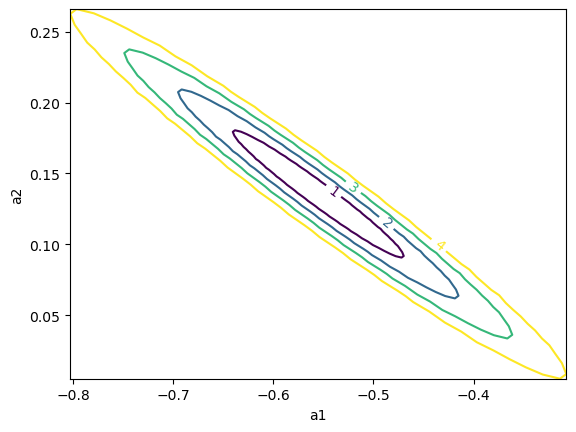

In [13]:
# Get a 2D contour of the function around the minimum for 2 parameters
# and draw a 2 D contours up to 4 sigma of a1 and a2  
m.draw_mncontour("a1", "a2", cl=[1, 2, 3, 4])


(array([0.07628965, 0.07748762, 0.07868559, 0.07988356, 0.08108153,
        0.0822795 , 0.08347748, 0.08467545, 0.08587342, 0.08707139,
        0.08826936, 0.08946733, 0.0906653 , 0.09186328, 0.09306125,
        0.09425922, 0.09545719, 0.09665516, 0.09785313, 0.0990511 ,
        0.10024908, 0.10144705, 0.10264502, 0.10384299, 0.10504096,
        0.10623893, 0.1074369 , 0.10863488, 0.10983285, 0.11103082,
        0.11222879, 0.11342676, 0.11462473, 0.1158227 , 0.11702068,
        0.11821865, 0.11941662, 0.12061459, 0.12181256, 0.12301053,
        0.12420851, 0.12540648, 0.12660445, 0.12780242, 0.12900039,
        0.13019836, 0.13139633, 0.13259431, 0.13379228, 0.13499025,
        0.13618822, 0.13738619, 0.13858416, 0.13978213, 0.14098011,
        0.14217808, 0.14337605, 0.14457402, 0.14577199, 0.14696996,
        0.14816793, 0.14936591, 0.15056388, 0.15176185, 0.15295982,
        0.15415779, 0.15535576, 0.15655373, 0.15775171, 0.15894968,
        0.16014765, 0.16134562, 0.16254359, 0.16

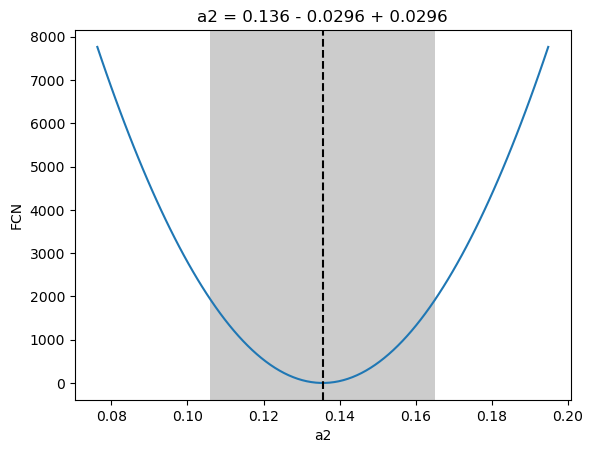

In [14]:
m.draw_profile("a2",subtract_min=True)

In [15]:
# access fit results by parameter name and get minos asymetric errors
print (m.merrors['a2'].lower)
print (m.merrors['a2'].upper)

-0.029647391105505568
0.029647391215961143


In [16]:
# more print out
print (m.values,m.errors)
print (m.errors)

<ValueView a0=1.884312126113227 a1=-0.555095569066645 a2=0.135589233702581 a3=-0.012129739293476468> <ErrorView a0=0.030846480016973075 a1=0.056345427583826234 a2=0.029649793193055433 a3=0.004578762777736633>
<ErrorView a0=0.030846480016973075 a1=0.056345427583826234 a2=0.029649793193055433 a3=0.004578762777736633>


In [17]:
# Access fit results
a0_fit = m.values["a0"]
a1_fit = m.values["a1"]
a2_fit = m.values["a2"]
a3_fit = m.values["a3"]

In [18]:
# display fitted function 
x_plot = np.linspace( 0.1, 4.1 , 100 )
y_fit = a0_fit + a1_fit * x_plot + a2_fit * x_plot**2 +  a3_fit * x_plot**3


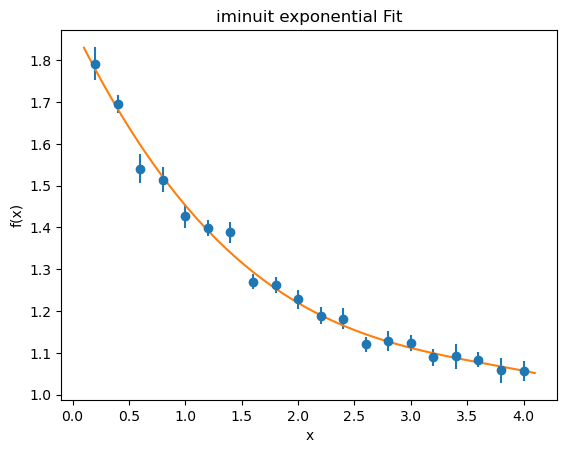

In [19]:
plt.figure()

plt.errorbar(x, y, dy , fmt="o")
plt.plot(x_plot,y_fit )           
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('iminuit exponential Fit')
#plt.axis([0,30,-1.2,1.2])

# show the plot
plt.show()